#0. 実行の準備

1. 高速に計算できるようにGPUを有効にする<br>
    メニューバー「ランタイム」→「ランタイムのタイプを変更」→「T4」

1. 画面「ドライブにコピーを保存」をクリック<br>
    ファイル名が「【模擬講義】DS入門.ipynbのコピー」に変更される

1. この演習で利用するモジュール(プログラムの部品)をインストールする。<br>
    次のコマンドを実行(ボタンをクリック)

In [1]:
# グラフに日本語を表示するモジュールをインストール
!pip install japanize_matplotlib

# 株価のろうそく足チャートを表示するモジュールをインストール
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 27.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=fd7b9f666838142537fb71eb8cbd2555e78530427108f12cf015f0a79e378840
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize_matplotlib
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.8 MB/s eta 0:00:00


#1. 気象データ weather.csv

気象庁のHPより過去のデータがダウンロードできる。
[気象庁のHP](https://www.data.jma.go.jp/risk/obsdl/index.php)

1900年から2025年4月までの東京、札幌、福岡、および1931年から2024年12月までの三島の月平均気温(templature)、月当たりの降水量(participation)、月当たりの日照時間(sunshine)として、weather.csvとしてGitHubに保存している。

これより、地球温暖化は本当か！？をテーマに、データ分析する。

## 1.1 データの読み込み

データを読み込み、保存された内容を確認する

PythonでURLを指定してCSV(カンマで区切られたファイル)ファイルを読み込む
```
url = 'https://raw.githubusercontent.com/HirooHirose/ds_Hirose/main/weather.csv'
df = pd.read_csv(url)
```

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# GitHubのraw CSVファイルURL
url = 'https://raw.githubusercontent.com/HirooHirose/ds_Hirose/main/weather.csv'
# CSVを読み込む
df = pd.read_csv(url)
# 日付をdatetime型に変換
df['date'] = pd.to_datetime(df['date'])

display(df)


,date,city,precipitation,sunshine,templature
0,1900-01-01,Tokyo,69.2,160.1,1.6
1,1900-02-01,Tokyo,31.3,174.9,3.1
2,1900-03-01,Tokyo,69.3,171.5,5.7
3,1900-04-01,Tokyo,168.6,135.3,11.4
4,1900-05-01,Tokyo,127.3,219.0,17.3
...,...,...,...,...,...
5623,2024-08-01,Mishima,457.0,189.0,28.9
5624,2024-09-01,Mishima,97.5,193.6,27.3
5625,2024-10-01,Mishima,233.5,129.4,21.3
5626,2024-11-01,Mishima,227.5,132.2,14.9


##1-2 データをグラフで表示

東京に絞って、1900年か2025年まで月平均気温がどのように変化したかグラフで表示したい

- 東京のデータだけ抽出したい
```
city_data = df[df['city'] == 'Tokyo']
```

- X軸を日付、Y軸を東京の月別平均気温(templature)として折れ線グラフ
```
plt.plot(city_data['date'], city_data['templature'], label='東京')
```

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

# GitHubのraw CSVファイルURL
url = 'https://raw.githubusercontent.com/HirooHirose/ds_Hirose/main/weather.csv'
# CSVを読み込む
df = pd.read_csv(url)
# 日付をdatetime型に変換
df['date'] = pd.to_datetime(df['date'])

# 東京の気温データだけを抽出
city_data = df[df['city'] == 'Tokyo']

# 折れ線グラフの描画
plt.figure(figsize=(12, 6))
#X軸を日付(date)、Y軸を月平均気温(templature)
plt.plot(city_data['date'], city_data['templature'], label='東京')
plt.title('東京の気温の推移')
plt.xlabel('日付')
plt.ylabel('気温（℃）')
plt.grid(True)
plt.legend()
plt.show()
plt.close()

###三島の気温の推移を表示してみよう

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

# GitHubのraw CSVファイルURL
url = 'https://raw.githubusercontent.com/HirooHirose/ds_Hirose/main/weather.csv'
# CSVを読み込む
df = pd.read_csv(url)
# 日付をdatetime型に変換
df['date'] = pd.to_datetime(df['date'])

# 三島(Mishima)の気温データだけを抽出
city_data = df[df['city'] == '']

# 折れ線グラフの描画
plt.figure(figsize=(12, 6))
#X軸を日付(date)、Y軸を月平均気温(templature)
plt.plot(city_data['date'], city_data['templature'], label='三島')
plt.title('三島の気温の推移')
plt.xlabel('日付')
plt.ylabel('気温（℃）')
plt.grid(True)
plt.legend()
plt.show()
plt.close()

##1-3 気温データを年ごとに平均化する

12か月のデータの平均値をとり、年ごとの平均気温データを作る
都市別に年ごとにグループ化(groupby)し、平均値(mean)を計算する
```
df_year = df.groupby(['city', 'year'])['templature'].mean().reset_index()
```

,city,year,templature
0,Fukuoka,1900,14.908333
1,Fukuoka,1901,14.516667
2,Fukuoka,1902,15.058333
3,Fukuoka,1903,15.116667
4,Fukuoka,1904,14.908333
...,...,...,...
464,Tokyo,2020,16.533333
465,Tokyo,2021,16.625000
466,Tokyo,2022,16.383333
467,Tokyo,2023,17.641667


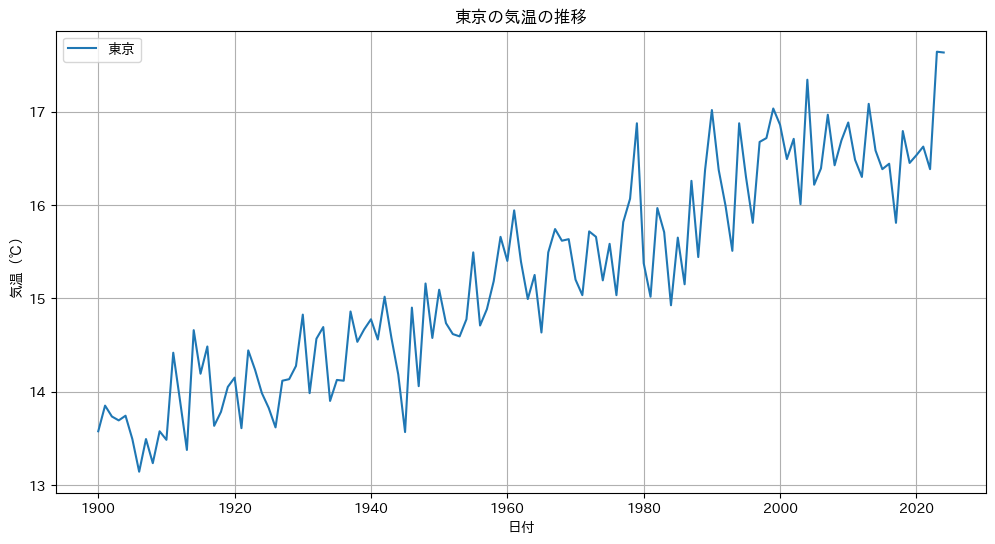

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

# GitHubのraw CSVファイルURL
url = 'https://raw.githubusercontent.com/HirooHirose/ds_Hirose/main/weather.csv'
# CSVを読み込む
df = pd.read_csv(url)
# 日付をdatetime型に変換
df['date'] = pd.to_datetime(df['date'])
# 都市別に年ごとにグループ化して平均気温を算出
df['year'] = df['date'].dt.year
df_year = df.groupby(['city', 'year'])['templature'].mean().reset_index()

display(df_year)

# 東京の気温データだけを抽出
city_data = df_year[df_year['city'] == 'Tokyo']

# 折れ線グラフの描画
plt.figure(figsize=(12, 6))
#X軸を日付(date)、Y軸を月平均気温(templature)
plt.plot(city_data['year'], city_data['templature'], label='東京')
plt.title('東京の気温の推移')
plt.xlabel('西暦')
plt.ylabel('気温（℃）')
plt.grid(True)
plt.legend()
plt.show()
plt.close()

###三島の年間平均気温の推移を表示してみよう

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

# GitHubのraw CSVファイルURL
url = 'https://raw.githubusercontent.com/HirooHirose/ds_Hirose/main/weather.csv'
# CSVを読み込む
df = pd.read_csv(url)
# 日付をdatetime型に変換
df['date'] = pd.to_datetime(df['date'])
# 都市別に年ごとにグループ化して平均気温を算出
df['year'] = df['date'].dt.year
df_year = df.groupby(['city', 'year'])['templature'].mean().reset_index()

display(df_year)

# 三島の気温データだけを抽出
city_data = df_year[df_year['city'] == 'Mishima']

# 折れ線グラフの描画
plt.figure(figsize=(12, 6))
#X軸を日付(date)、Y軸を月平均気温(templature)
plt.plot(city_data['year'], city_data['templature'], label='三島')
plt.title('三島の気温の推移')
plt.xlabel('西暦')
plt.ylabel('気温（℃）')
plt.grid(True)
plt.legend()
plt.show()
plt.close()

# 移動平均とは？

**移動平均（Moving Average, MA）** とは、時系列データの変動を平滑化し、傾向（トレンド）を把握するための基本的な手法。  
株価・気温・売上など、変動のあるデータに対してよく使われる。

---

## 単純移動平均（SMA: Simple Moving Average）

###  定義  
直近 n 期間のデータの単純な平均

###  数式

$$
SMA_t = \frac{1}{n} \sum_{i=0}^{n-1} x_{t-i}
$$

- $ SMA_t $：時刻 t における移動平均
- $ x_t $：時刻 t の元データ（例：株価）
- $ n $：平均を取る期間

---

##  加重移動平均（WMA: Weighted Moving Average）

###  定義  
各データに重みをかけて平均する方法。最近のデータに大きな重みを与える

###  数式

$$
WMA_t = \frac{\sum_{i=0}^{n-1} w_i \cdot x_{t-i}}{\sum_{i=0}^{n-1} w_i}
$$

- $ w_i $：各時点に対応する重み

---

##  指数移動平均（EMA: Exponential Moving Average）

###  定義  
過去すべてのデータを指数的に減衰させながら平均する方法

###  数式（再帰的）

$$
EMA_t = \alpha \cdot x_t + (1 - \alpha) \cdot EMA_{t-1}
$$

- $ \alpha $ ：平滑化係数（例：$ \alpha = \frac{2}{n+1} $）

---

## 用途別の選び方

| 種類 | 特徴 | 主な用途 |
|------|------|----------|
| SMA  | シンプルで計算が容易 | 基本的なトレンド分析 |
| WMA  | 最近のデータに重み | 素早いトレンド反応 |
| EMA  | すべての過去データを考慮 | テクニカル指標で一般的 |


##算術移動平均の実装

算術移動平均を実装するには、**rolling(window=期間数).mean()**
```
kikan = 7
tokyo_data['SMA'] = tokyo_data['templature'].rolling(window=kikan).mean()
```

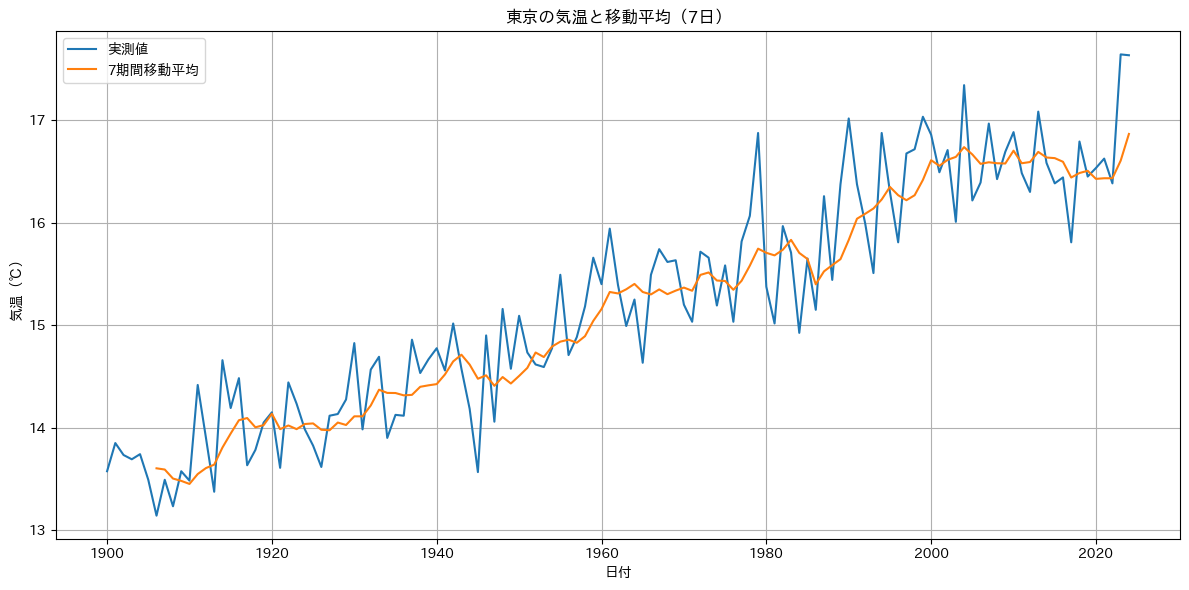

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# GitHubのraw CSVファイルURL
url = 'https://raw.githubusercontent.com/HirooHirose/ds_Hirose/main/weather.csv'
# CSVを読み込む
df = pd.read_csv(url)
# 日付をdatetime型に変換
df['date'] = pd.to_datetime(df['date'])
# 都市別に年ごとにグループ化して平均気温を算出
df['year'] = df['date'].dt.year
df_year = df.groupby(['city', 'year'])['templature'].mean().reset_index()
#display(df_year)

# 東京の気温データだけを抽出
city_data = df_year[df_year['city'] == 'Tokyo'].copy()

# 移動平均（kikanカ月）を計算
kikan = 7
city_data['SMA'] = city_data['templature'].rolling(window=kikan).mean()

# グラフ描画
plt.figure(figsize=(12, 6))
plt.plot(city_data['year'], city_data['templature'], label='実測値')
plt.plot(city_data['year'], city_data['SMA'], label=f'{kikan}期間移動平均')
plt.title('東京の気温と移動平均（7日）')
plt.xlabel('西暦')
plt.ylabel('気温（℃）')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


###三島の年間平均気温を移動平均法で平滑化し表示してみよう

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# GitHubのraw CSVファイルURL
url = 'https://raw.githubusercontent.com/HirooHirose/ds_Hirose/main/weather.csv'
# CSVを読み込む
df = pd.read_csv(url)
# 日付をdatetime型に変換
df['date'] = pd.to_datetime(df['date'])
# 都市別に年ごとにグループ化して平均気温を算出
df['year'] = df['date'].dt.year
df_year = df.groupby(['city', 'year'])['templature'].mean().reset_index()
#display(df_year)

# 三島の気温データだけを抽出
city_data = df_year[df_year['city'] == ''].copy()

# 移動平均（kikanカ月）を計算
kikan = 7
city_data['SMA'] = city_data['templature'].rolling(window=kikan).mean()

# グラフ描画
plt.figure(figsize=(12, 6))
plt.plot(city_data['year'], city_data['templature'], label='実測値')
plt.plot(city_data['year'], city_data['SMA'], label=f'{kikan}期間移動平均')
plt.title('三島の気温と移動平均（7日）')
plt.xlabel('西暦')
plt.ylabel('気温（℃）')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


###問題1
東京と札幌(sapporo)の年間平均気温を比較し、平均気温が上がっているか確かめる

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# GitHubのraw CSVファイルURL
url = 'https://raw.githubusercontent.com/HirooHirose/ds_Hirose/main/weather.csv'
# CSVを読み込む
df = pd.read_csv(url)
# 日付をdatetime型に変換
df['date'] = pd.to_datetime(df['date'])
# 都市別に年ごとにグループ化して平均気温を算出
df['year'] = df['date'].dt.year
df_year = df.groupby(['city', 'year'])['templature'].mean().reset_index()
#display(df_year)

# 東京の気温データだけを抽出
city_data = df_year[df_year['city'] == 'Tokyo'].copy()
#札幌の気温データだけを抽出
city_data2 = df_year[df_year['city'] == 'Sapporo'].copy()

# 移動平均（kikan年）を計算
kikan = 7
city_data['SMA'] = city_data['templature'].rolling(window=kikan).mean()
city_data2['SMA'] = city_data2['templature'].rolling(window=kikan).mean()

# グラフ描画
plt.figure(figsize=(12, 6))
plt.plot(city_data['year'], city_data['templature'], label='東京実測値')
plt.plot(city_data['year'], city_data['SMA'], label=f'{kikan}年移動平均')
plt.plot(city_data2['year'], city_data2['templature'], label='札幌実測値')
plt.plot(city_data2['year'], city_data2['SMA'], label=f'{kikan}年移動平均')
plt.title(f'東京と札幌の気温と移動平均（{kikan}年）')
plt.xlabel('西暦')
plt.ylabel('気温（℃）')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


###問題２

東京の日照時間の推移をグラフで表示する。

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# GitHubのraw CSVファイルURL
url = 'https://raw.githubusercontent.com/HirooHirose/ds_Hirose/main/weather.csv'
# CSVを読み込む
df = pd.read_csv(url)
# 日付をdatetime型に変換
df['date'] = pd.to_datetime(df['date'])
# 都市別に年ごとにグループ化して平均気温を算出
df['year'] = df['date'].dt.year
########################################日照時間(sunshine)#############
df_year = df.groupby(['city', 'year'])[''].mean().reset_index()
#display(df_year)

# 東京の気温データだけを抽出
city_data = df_year[df_year['city'] == 'Tokyo'].copy()

# 移動平均（kikanカ月）を計算
kikan = 7
########################################日照時間(sunshine)#############
city_data['SMA'] = city_data[''].rolling(window=kikan).mean()

# グラフ描画
plt.figure(figsize=(12, 6))
########################################日照時間(sunshine)#############
plt.plot(city_data['year'], city_data[''], label='東京実測値')
plt.plot(city_data['year'], city_data['SMA'], label=f'東京{kikan}年移動平均')
plt.title(f'東京の日照時間と移動平均（{kikan}年）')
plt.xlabel('西暦')
plt.ylabel('気温（℃）')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###三島の日照時間の変化を可視化しよう

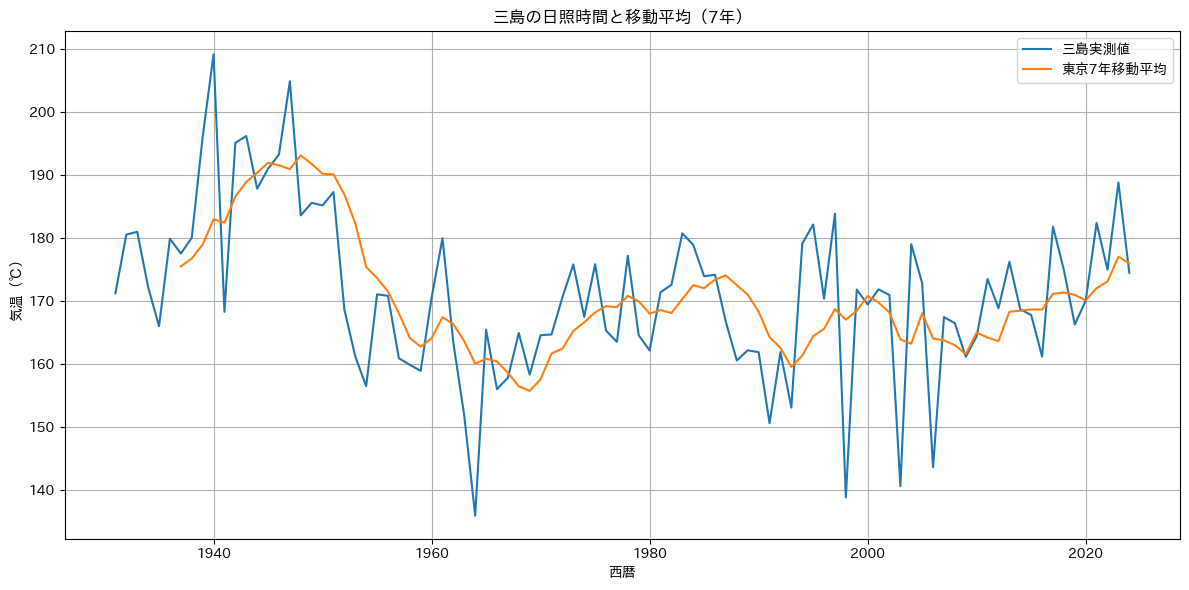

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# GitHubのraw CSVファイルURL
url = 'https://raw.githubusercontent.com/HirooHirose/ds_Hirose/main/weather.csv'
# CSVを読み込む
df = pd.read_csv(url)
# 日付をdatetime型に変換
df['date'] = pd.to_datetime(df['date'])
# 都市別に年ごとにグループ化して日照時間を算出
df['year'] = df['date'].dt.year
########################################日照時間(sunshine)#############
df_year = df.groupby(['city', 'year'])[''].mean().reset_index()
#display(df_year)

# 三島の気温データだけを抽出
city_data = df_year[df_year['city'] == ''].copy()

# 移動平均（kikanカ月）を計算
kikan = 7
city_data['SMA'] = city_data['sunshine'].rolling(window=kikan).mean()

# グラフ描画
plt.figure(figsize=(12, 6))
plt.plot(city_data['year'], city_data['sunshine'], label='三島実測値')
plt.plot(city_data['year'], city_data['SMA'], label=f'東京{kikan}年移動平均')
plt.title(f'三島の日照時間と移動平均（{kikan}年）')
plt.xlabel('西暦')
plt.ylabel('気温（℃）')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###三島の降水量データの変化を可視化しよう

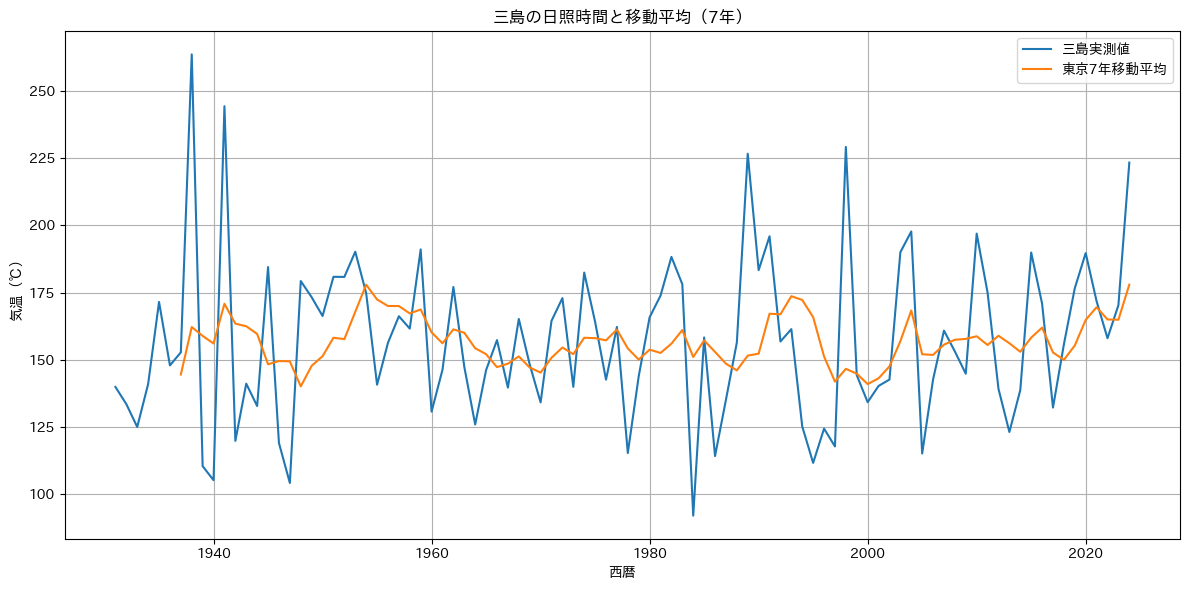

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# GitHubのraw CSVファイルURL
url = 'https://raw.githubusercontent.com/HirooHirose/ds_Hirose/main/weather.csv'
# CSVを読み込む
df = pd.read_csv(url)
# 日付をdatetime型に変換
df['date'] = pd.to_datetime(df['date'])
# 都市別に年ごとにグループ化して日照時間を算出
df['year'] = df['date'].dt.year
########################################降水量(precipitation)#############
df_year = df.groupby(['city', 'year'])[''].mean().reset_index()
#display(df_year)

# 東京の気温データだけを抽出
city_data = df_year[df_year['city'] == ''].copy()

# 移動平均（kikanカ月）を計算
kikan = 7
city_data['SMA'] = city_data[''].rolling(window=kikan).mean()

# グラフ描画
plt.figure(figsize=(12, 6))
plt.plot(city_data['year'], city_data[''], label='三島実測値')
plt.plot(city_data['year'], city_data['SMA'], label=f'三島{kikan}年移動平均')
plt.title(f'三島の降水量と移動平均（{kikan}年）')
plt.xlabel('西暦')
plt.ylabel('気温（℃）')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#株価データ

## 2－1 株価データとは
株価データを提供しているサイト[Investing.com](https://jp.investing.com/equities)

株価情報は、終値(おわりね)、始値(はじめね)、高値、安値、出来高(一日の取引数)として保存されている。

(株)inpexの2020年から2025年8月27日までの株価情報を取得し、GitHubに1605.csvとして保存されている。


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# GitHubのraw CSVファイルURL
url = 'https://raw.githubusercontent.com/HirooHirose/ds_Hirose/main/1605.csv'

# CSVを読み込む
df = pd.read_csv(url)

# 'date' を日付型に変換してインデックスに設定
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
#データの確認
display(df)


,Close,Open,High,Low,Volume
date,,,,,
2020-01-06,1183.0,1155.0,1190.0,1146.5,9.02
2020-01-07,1183.0,1178.5,1191.5,1165.5,5.04
2020-01-08,1187.0,1209.5,1217.0,1172.0,8.82
2020-01-09,1155.0,1143.5,1156.0,1131.0,7.29
2020-01-10,1170.0,1158.0,1171.5,1152.5,4.65
...,...,...,...,...,...
2025-04-25,1816.5,1810.0,1819.0,1807.0,5.69
2025-04-28,1825.0,1831.0,1837.5,1820.0,5.23
2025-04-30,1809.0,1823.5,1830.0,1805.5,9.32


##2-2 株価の可視化

このデータを株価チャート(ろうそく足チャート)で表示するプログラム

[ろうそく足チャート](https://drive.google.com/file/d/1Hu2NkdC1827ZOZhYyw9Y_CFLEyRVcsy0/view?usp=sharing)



/usr/local/lib/python3.12/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


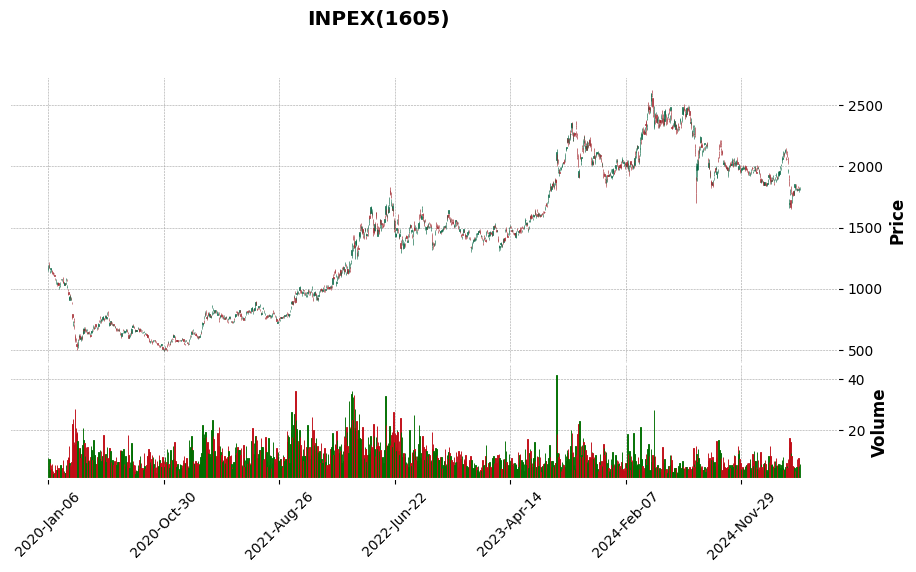

In [ ]:
# ろうそく足チャートモジュールのインポート
import pandas as pd
import mplfinance as mpf

# データの読み込み
url = 'https://raw.githubusercontent.com/HirooHirose/ds_Hirose/main/1605.csv'
df = pd.read_csv(url)
# インデックスに日付を設定
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
#display(df)

# ローソク足チャートの描画
mpf.plot(df, type='candle', style='charles', volume=True,title='INPEX(1605)', ylabel='Price', ylabel_lower='Volume',figratio=(12, 6))

##2-3 表示の指定

現状は2020年からデータが多すぎてWarningが表示される。

そこで、2025年1月1日からのデータに限定してグラフを表示する。


,Close,Open,High,Low,Volume
date,,,,,
2025-01-06,2004.5,1990.0,2005.0,1984.5,11.78
2025-01-07,1984.5,1999.0,2000.0,1966.0,7.90
2025-01-08,1993.5,1982.5,2001.0,1965.5,8.02
2025-01-09,1958.0,1983.0,1984.0,1955.0,5.75
2025-01-10,1950.0,1958.0,1966.5,1950.0,4.01
...,...,...,...,...,...
2025-04-25,1816.5,1810.0,1819.0,1807.0,5.69
2025-04-28,1825.0,1831.0,1837.5,1820.0,5.23
2025-04-30,1809.0,1823.5,1830.0,1805.5,9.32


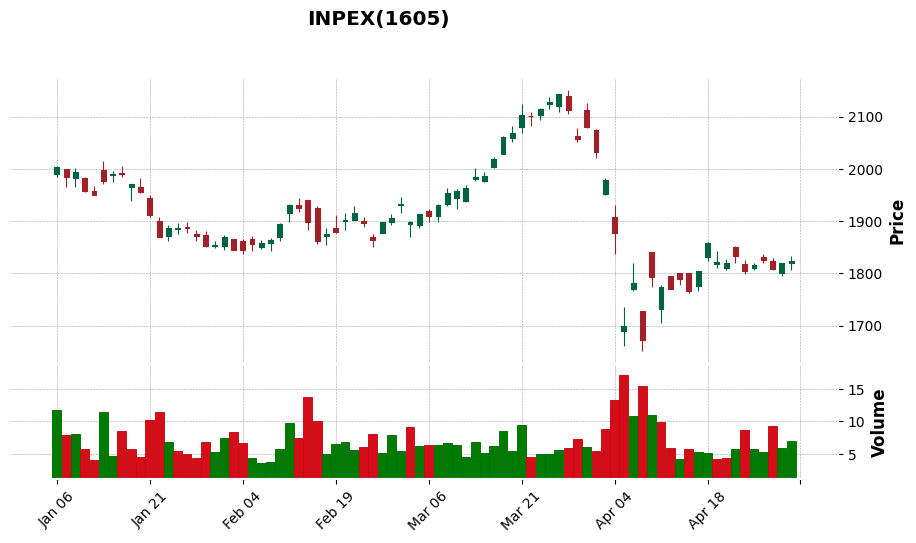

In [ ]:
# ろうそく足チャートモジュールのインポート
import pandas as pd
import mplfinance as mpf

# データの読み込み
url = 'https://raw.githubusercontent.com/HirooHirose/ds_Hirose/main/1605.csv'
df = pd.read_csv(url)
# インデックスに日付を設定
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

#日付を設定
df = df[df.index >= '2025-01-01']
display(df)

# ローソク足チャートの描画
mpf.plot(df, type='candle', style='charles', volume=True,title='INPEX(1605)', ylabel='Price', ylabel_lower='Volume',figratio=(12, 6))


##2-4 株価を予測

株価を予測したい。株価で一番重要視されているのは、終値である。
終値だけのチャートを表示するプログラム。




,Close,Open,High,Low,Volume
date,,,,,
2020-01-06,1183.0,1155.0,1190.0,1146.5,9.02
2020-01-07,1183.0,1178.5,1191.5,1165.5,5.04
2020-01-08,1187.0,1209.5,1217.0,1172.0,8.82
2020-01-09,1155.0,1143.5,1156.0,1131.0,7.29
2020-01-10,1170.0,1158.0,1171.5,1152.5,4.65
...,...,...,...,...,...
2025-04-25,1816.5,1810.0,1819.0,1807.0,5.69
2025-04-28,1825.0,1831.0,1837.5,1820.0,5.23
2025-04-30,1809.0,1823.5,1830.0,1805.5,9.32


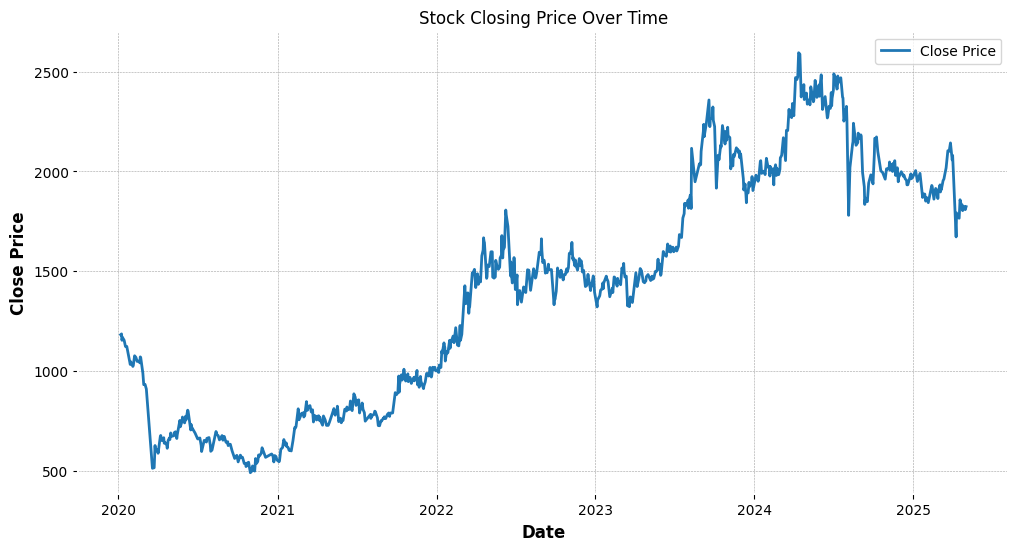

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# GitHubのraw CSVファイルURL
url = 'https://raw.githubusercontent.com/HirooHirose/ds_Hirose/main/1605.csv'

# CSVを読み込む
df = pd.read_csv(url)

# 'date' を日付型に変換してインデックスに設定
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
#日付を設定
#df = df[df.index >= '2025-01-01']
display(df)

# 折れ線グラフの作成（終値）
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()
plt.close()

##2-5 10日後の株価をGRUで予測する


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# データ読み込み（GitHub等から）
url = 'https://raw.githubusercontent.com/HirooHirose/ds_Hirose/main/1605.csv'
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df[df.index >= '2025-01-01'][['Close']]

# スケーリング
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

# 時系列データ作成
def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled, seq_length)

# GRUモデル構築
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(seq_length, 1)),
    tf.keras.layers.GRU(64),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=100, verbose=0)

# 10日間を再帰的に予測
last_seq = scaled[-seq_length:].reshape(1, seq_length, 1)
preds = []
for _ in range(10):
    pred = model.predict(last_seq, verbose=0)[0, 0]
    preds.append(pred)
    last_seq = np.append(last_seq[:, 1:, :], [[[pred]]], axis=1)

# 逆正規化して表示
pred_prices = scaler.inverse_transform(np.array(preds).reshape(-1, 1))
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=10, freq='B')
forecast_df = pd.DataFrame(pred_prices.round(1), index=future_dates, columns=['Predicted Close'])

print(f"5月7日以降10日間の予測\n {forecast_df}")

5月7日以降10日間の予測
             Predicted Close
2025-05-05      1843.199951
2025-05-06      1853.400024
2025-05-07      1866.500000
2025-05-08      1880.500000
2025-05-09      1894.800049
2025-05-12      1908.900024
2025-05-13      1922.400024
2025-05-14      1935.000000
2025-05-15      1946.300049
2025-05-16      1956.099976


## 結果をグラフで表示する

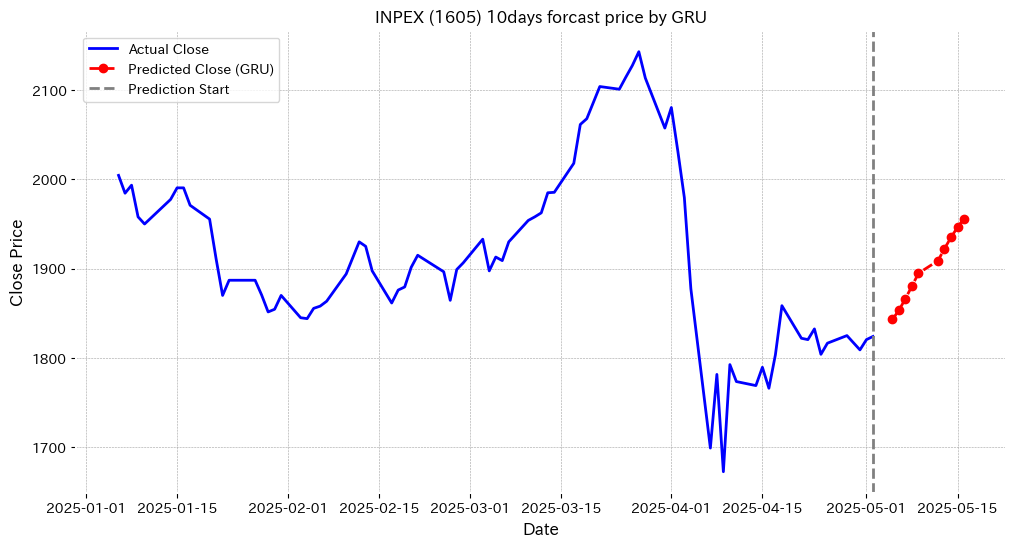

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

# グラフ描画
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual Close', color='blue')
plt.plot(forecast_df.index, forecast_df['Predicted Close'], label='Predicted Close (GRU)', color='red', linestyle='--', marker='o')
plt.axvline(x=df.index[-1], color='gray', linestyle='dashed', label='Prediction Start')
plt.title('INPEX (1605) 10days forcast price by GRU')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
#plt.tight_layout()
plt.show()
plt.close()

###2-6 2022年1月1日から最新データから、10日後までの株価を予測する

In [ ]:
#指定した日付以降のデータを読み取り、ファイルに保存する
#ticker変数に、株の銘柄を入力
#df_stockダウンロード時に、開始時期を入力

import yfinance as yf
import pandas as pd

# INPEX (1605.T) の株価を取得
ticker = "1605.T"
df_stock = yf.download(ticker, start="2022-01-01")

# 日付を列にする
df_stock.reset_index(inplace=True)

# もし列が MultiIndex の場合、下の階層 (株価データのカラム名) を利用
if isinstance(df_stock.columns, pd.MultiIndex):
    df_stock.columns = df_stock.columns.get_level_values(0)

# 必要な列を選んで並び替え
df_formatted = df_stock.rename(columns={
    "Date": "date",
    "Close": "Close",
    "Open": "Open",
    "High": "High",
    "Low": "Low",
    "Volume": "Volume"
})[["date", "Close", "Open", "High", "Low", "Volume"]]

# CSVとして保存
output_stock_path = "inpex_1605_stock_formatted.csv"
df_formatted.to_csv(output_stock_path, index=False, date_format="%Y/%m/%d")

print(f"保存完了: {output_stock_path}")
print(df_formatted.head())


/tmp/ipython-input-3026857484.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_stock = yf.download(ticker, start="2022-01-01")
[*********************100%***********************]  1 of 1 completed

保存完了: inpex_1605_stock_formatted.csv
Price       date       Close        Open        High         Low    Volume
0     2022-01-04  863.827881  876.759436  878.483643  862.103674   6635600
1     2022-01-05  875.035217  873.311010  883.656254  870.724699  10428200
2     2022-01-06  856.931152  879.345850  881.932162  852.620633  12511500
3     2022-01-07  888.828857  868.138370  888.828857  867.276266  13425000
4     2022-01-11  878.483704  885.380533  887.966845  868.138459   9143100


In [ ]:
#最新のデータから10日先を予測
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# データ読み込み（GitHub等から）
url = './inpex_1605_stock_formatted.csv'
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df[df.index >= '2022-01-01'][['Close']]

# スケーリング
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

# 時系列データ作成
def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled, seq_length)

# GRUモデル構築
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(seq_length, 1)),
    tf.keras.layers.GRU(64),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=100, verbose=0)

# 10日間を再帰的に予測
last_seq = scaled[-seq_length:].reshape(1, seq_length, 1)
preds = []
for _ in range(10):
    pred = model.predict(last_seq, verbose=0)[0, 0]
    preds.append(pred)
    last_seq = np.append(last_seq[:, 1:, :], [[[pred]]], axis=1)

# 逆正規化して表示
pred_prices = scaler.inverse_transform(np.array(preds).reshape(-1, 1))
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=10, freq='B')
forecast_df = pd.DataFrame(pred_prices.round(1), index=future_dates, columns=['Predicted Close'])

print(f"10日先の予測\n {forecast_df}")

10日先の予測
             Predicted Close
2025-08-29      2529.300049
2025-09-01      2548.800049
2025-09-02      2560.699951
2025-09-03      2572.899902
2025-09-04      2585.000000
2025-09-05      2596.899902
2025-09-08      2608.600098
2025-09-09      2620.100098
2025-09-10      2631.399902
2025-09-11      2642.399902


### 2025年1月1日から現在までの株価推移と、10日後の株価の予測

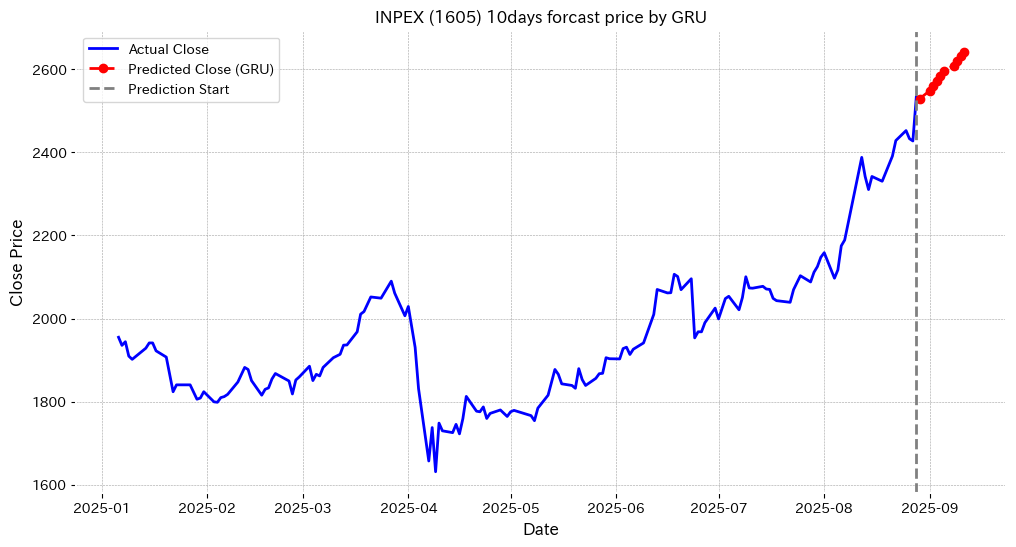

In [ ]:
#結果をグラフで表示
import matplotlib.pyplot as plt
import japanize_matplotlib

df_disp = df[df.index >= '2025-01-01']

# グラフ描画
plt.figure(figsize=(12, 6))
plt.plot(df_disp.index, df_disp['Close'], label='Actual Close', color='blue')
plt.plot(forecast_df.index, forecast_df['Predicted Close'], label='Predicted Close (GRU)', color='red', linestyle='--', marker='o')
plt.axvline(x=df.index[-1], color='gray', linestyle='dashed', label='Prediction Start')
plt.title('INPEX (1605) 10days forcast price by GRU')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
#plt.tight_layout()
plt.show()
plt.close()